# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.

   Dataset berasal dari kaggle : mbjunior/valve-plate-failure-prediction-in-hydraulic-pumps


# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler


# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

In [9]:
df_ot = pd.read_csv('../valveplatefailure_raw/dane_OT.csv')
df_ut1 = pd.read_csv('../valveplatefailure_raw/dane_UT1.csv')
df_ut2 = pd.read_csv('../valveplatefailure_raw/dane_UT2.csv')
df_ut3 = pd.read_csv('../valveplatefailure_raw/dane_UT3.csv')

df_ot.head()

,Czas2,Czas,Pressure - leak line,Temperature - leak line,Pressure - output,Temperature - suction line,Temperature - output,Flow - leak line,Flow - output,Temp. diff,stan
0,2023-03-02 14:40:26+00:00,2023-03-02 14:40:26+00:00,0.173043,33.648261,-0.339130,17.951739,17.314348,0.0,-0.533478,15.696522,0
1,2023-03-02 14:40:27+00:00,2023-03-02 14:40:27+00:00,0.174255,33.646596,-0.405957,17.947234,17.309149,0.0,-0.524894,15.699362,0
2,2023-03-02 14:40:28+00:00,2023-03-02 14:40:28+00:00,0.176327,33.649184,-0.368776,17.950612,17.316735,0.0,-0.538571,15.698571,0
3,2023-03-02 14:40:29+00:00,2023-03-02 14:40:29+00:00,0.176939,33.646735,-0.400204,17.952449,17.312653,0.0,-0.528367,15.694286,0
4,2023-03-02 14:40:30+00:00,2023-03-02 14:40:30+00:00,0.174186,33.644884,-0.265581,17.950000,17.310233,0.0,-0.532791,15.694884,0


Karena dataset dibagi berdasarkan label kerusakan normal, failure tuype 1, 2 dan 3. Maka selanjutnya kita akan menggabungkan seluruh dataset menjadi satuframe. Tujuannya agar memudahkan pemrosesan data selanjutnya.

In [11]:
# Tambah kolom label
df_ot['label'] = 0  # normal
df_ut1['label'] = 1  # failure type 1
df_ut2['label'] = 2  # failure type 2
df_ut3['label'] = 3  # failure type 3

# Gabungkan semua data
df_full = pd.concat([df_ot, df_ut1, df_ut2, df_ut3], ignore_index=True)

# Cek hasil gabungan
print("Jumlah total data:", df_full.shape)
df_full['label'].value_counts()

Jumlah total data: (153205, 12)


label
0    68347
1    54053
3    16472
2    14333
Name: count, dtype: int64

# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [13]:
#Type your code here# Cek struktur data
df_full.info()

# Cek missing values
df_full.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153205 entries, 0 to 153204
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Czas2                       153205 non-null  object 
 1   Czas                        153205 non-null  object 
 2   Pressure - leak line        153205 non-null  float64
 3   Temperature - leak line     153205 non-null  float64
 4   Pressure - output           153205 non-null  float64
 5   Temperature - suction line  153205 non-null  float64
 6   Temperature - output        153205 non-null  float64
 7   Flow - leak line            153205 non-null  float64
 8   Flow - output               146359 non-null  float64
 9   Temp. diff                  153205 non-null  float64
 10  stan                        153205 non-null  int64  
 11  label                       153205 non-null  int64  
dtypes: float64(8), int64(2), object(2)
memory usage: 14.0+ MB


Czas2                            0
Czas                             0
Pressure - leak line             0
Temperature - leak line          0
Pressure - output                0
Temperature - suction line       0
Temperature - output             0
Flow - leak line                 0
Flow - output                 6846
Temp. diff                       0
stan                             0
label                            0
dtype: int64

In [14]:
# Cek jumlah baris duplikat
duplicate_rows = df_full.duplicated()
print("Jumlah duplikasi:", duplicate_rows.sum())

if duplicate_rows.sum() > 0:
    display(df_full[duplicate_rows].head())


Jumlah duplikasi: 0


In [15]:
# Statistik deskriptif semua fitur numerik
df_full.describe()

,Pressure - leak line,Temperature - leak line,Pressure - output,Temperature - suction line,Temperature - output,Flow - leak line,Flow - output,Temp. diff,stan,label
count,153205.000000,153205.000000,153205.000000,153205.000000,153205.000000,153205.000000,146359.000000,153205.000000,153205.000000,153205.000000
mean,0.194556,48.450534,137.187991,34.368517,36.156113,1.742112,61.302737,14.082017,0.553885,0.862472
std,0.045841,7.548650,76.776411,8.725532,8.849674,1.366422,11.475802,4.084872,0.497090,0.975103
min,0.000000,0.000000,-4.627143,0.000000,0.000000,-0.367347,-0.912105,-7.902500,0.000000,0.000000
25%,0.162083,44.490714,64.599375,28.149412,30.151111,0.262308,61.998125,11.690870,0.000000,0.000000
50%,0.194375,48.750000,152.381190,34.754792,36.430000,1.696047,63.185909,13.849512,1.000000,1.000000
75%,0.225641,54.004138,197.194667,41.768718,43.478947,2.737500,64.931708,16.891316,1.000000,1.000000
max,0.451111,63.754857,294.052308,50.419020,53.285490,6.258444,67.602821,24.748929,1.000000,3.000000


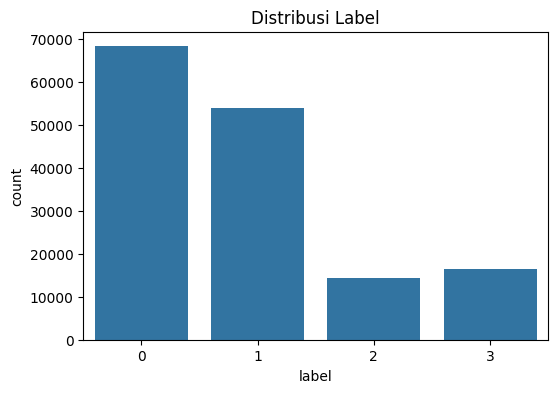

In [16]:
# visualisasi distirbusi label
plt.figure(figsize=(6,4))
sns.countplot(x='label', data=df_full)
plt.title('Distribusi Label')
plt.show()


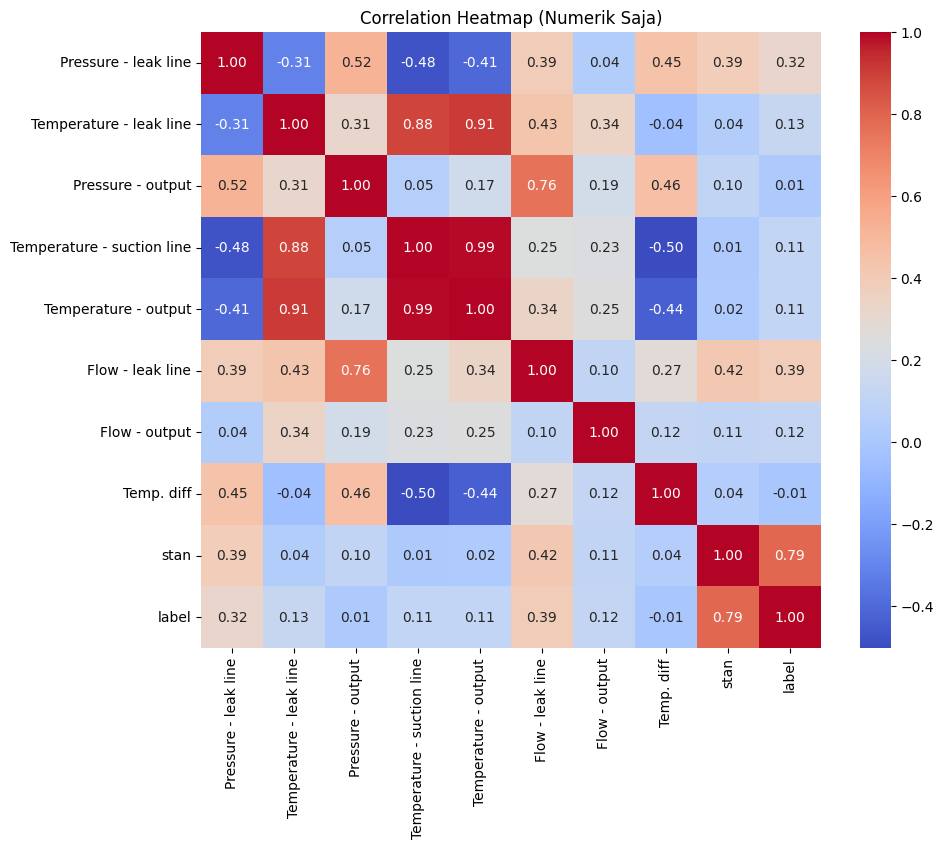

In [17]:
# Membuat heatmap
df_numeric = df_full.select_dtypes(include='number')

# Buat heatmap korelasi hanya dari numerik
plt.figure(figsize=(10, 8))
sns.heatmap(df_numeric.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Heatmap (Numerik Saja)')
plt.show()



### Insight:
- Pada `Flow - output` terdapat missing value mencapai 6846.
- Tidak ada data duplikat.
- Distribusi label tidak merata dengan dominasi `label` 0 dan 1. 
- **Temperature - suction line** dan **Temperature - output** memiliki korelasi sangat tinggi (`> 0.99`), menunjukkan bahwa keduanya kemungkinan merepresentasikan sumber suhu yang hampir identik.
- **Pressure - output** berkorelasi tinggi dengan **Flow - leak line** (`0.76`), menunjukkan hubungan linier yang kuat antara tekanan output dan aliran kebocoran.
- **Fitur `stan`** memiliki korelasi tinggi terhadap `label` (`0.79`), yang mengindikasikan fitur ini sangat berpengaruh dalam membedakan kondisi normal dan fault.
- Fitur `Flow - output` menunjukkan korelasi yang rendah terhadap label (`0.12`), yang mungkin membuatnya kurang relevan untuk klasifikasi, kecuali digunakan bersama fitur lain.

### Catatan:
- Korelasi tinggi antar dua fitur bisa menjadi dasar untuk mempertimbangkan **reduksi dimensi** atau **pemilihan fitur**, terutama jika model sensitif terhadap multikolinearitas (misalnya regresi linear).

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

## **1. Menangani Missing Values**

In [22]:
# menangani data kosong 

#mengecek proporsi data kosong 
total_rows = df_full.shape[0]
missing_flow_output = df_full['Flow - output'].isnull().sum()

print(f"Proporsi missing: {missing_flow_output} / {total_rows} = {missing_flow_output / total_rows:.2%}")

median_flow = df_full['Flow - output'].median()
df_full['Flow - output'].fillna(median_flow, inplace=True)

print(f"Missing values setelah imputasi: {df_full['Flow - output'].isnull().sum()}")


Proporsi missing: 6846 / 153205 = 4.47%
Missing values setelah imputasi: 0


/var/folders/nj/3mxkmzp158qbh94npggnk3_h0000gn/T/ipykernel_3305/2320466342.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_full['Flow - output'].fillna(median_flow, inplace=True)


## **2. Mendeteksi dan Menangani Outlier**

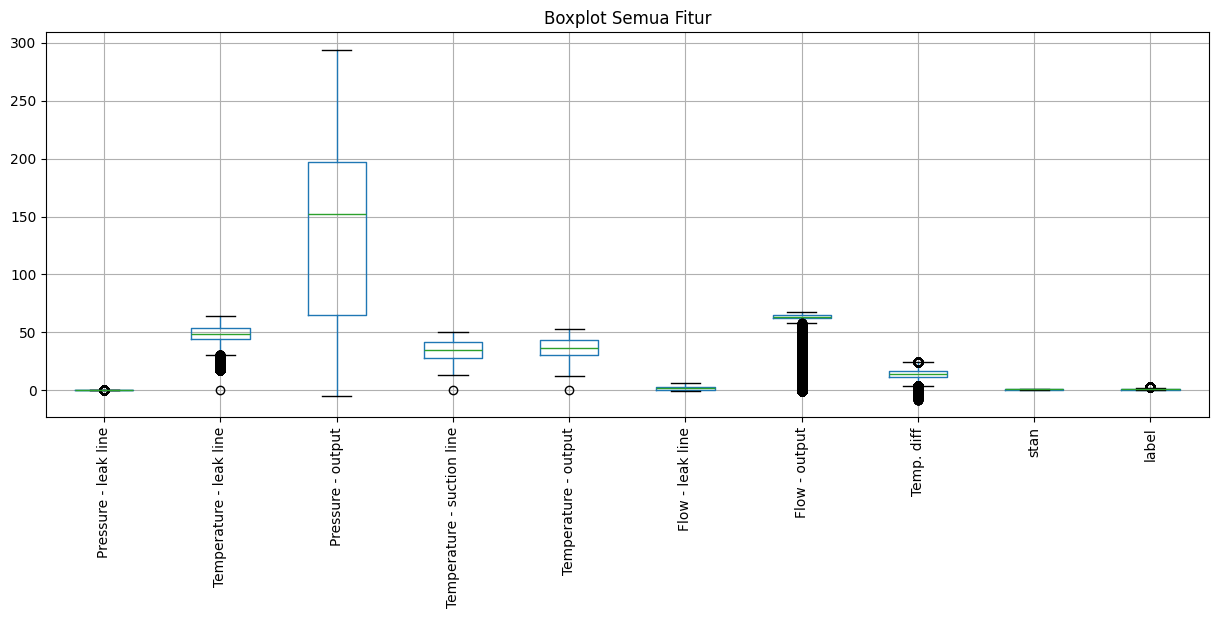

In [24]:
# Mengecek outlier data 
df_full.boxplot(figsize=(15, 5), rot=90)
plt.title("Boxplot Semua Fitur")
plt.show()


## **3. Normalisasi**

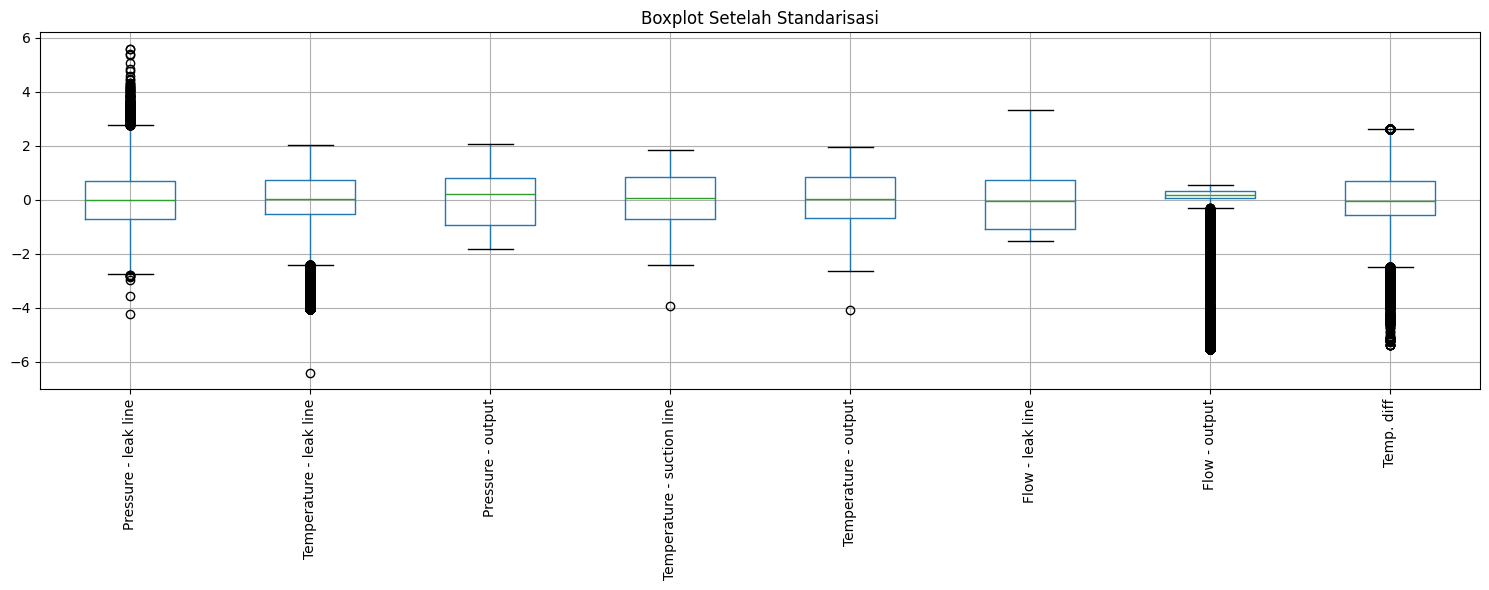

In [26]:
# (tanpa label & fitur diskrit seperti 'stan')
fitur_numerik = df_full.select_dtypes(include='number').drop(columns=['label', 'stan'])
scaler = StandardScaler()
scaled_values = scaler.fit_transform(fitur_numerik)
df_scaled = pd.DataFrame(scaled_values, columns=fitur_numerik.columns)

# Gabungkan kembali dengan kolom lain
df_preprocessed = pd.concat([df_scaled, df_full[['stan', 'label']]], axis=1)

# 4️⃣ Visualisasi Outlier dengan Boxplot
plt.figure(figsize=(15, 6))
df_scaled.boxplot(rot=90)
plt.title("Boxplot Setelah Standarisasi")
plt.tight_layout()
plt.show()